# Hands-on session 2: Advanced Neo

These exercises build on concepts introduced in Tutorial 2

## Preparation: Download public ephys dataset
On Linux you can download the compiled nix file via the command below. On other systems, please download the file manually from [here](https://gin.g-node.org/NeuralEnsemble/neo_elephant_teaching/raw/master/reach_to_grasp_material/i140703-001.nix) and save it in the same folder as this notebook. This is the same file as already used in Tutorial 2.

In [1]:
#!wget -O reach_to_grasp_material/i140703-001.nix https://gin.g-node.org/NeuralEnsemble/neo_elephant_teaching/raw/master/reach_to_grasp_material/i140703-001.nix

### SpikeTrain visualization
1. Load the data `i140703-001.nix` file using the `neo.io.NixIO` into a neo Block.
3. Here we will only investigate data measured between 2 seconds - 12 seconds of the datasets. Create a new neo Segment that only contains data of that time range.
2. Select all SpikeTrains that are marked as single unit activity and have `unit_id` 1. How many of those SpikeTrains exist in the dataset?

4. Plot the spike times in a raster plot. Use the `connector_aligned_id` as vertical offset for each Spiketrain avoid overlapping spike markers.
5. Add vertical lines to indicate event times labeled as `TS-ON`, `SR`, `OT` and `RW-ON`.

### Your solution

In [2]:
import neo
with neo.io.NixIO('reach_to_grasp_material/i140703-001.nix', 'ro') as io:
    block = io.read_block()

In [3]:
import quantities as pq
segment_cut = block.segments[0].time_slice(1*pq.s, 12*pq.s)

In [4]:
sts = segment_cut.filter(objects='SpikeTrain', targdict=[{'unit_id':1}, {'sua':True}])
print(f'There are {len(sts)} SpikeTrains with unit_id 1 classified as single unit activity.')

There are 78 SpikeTrains with unit_id 1 classified as single unit activity.


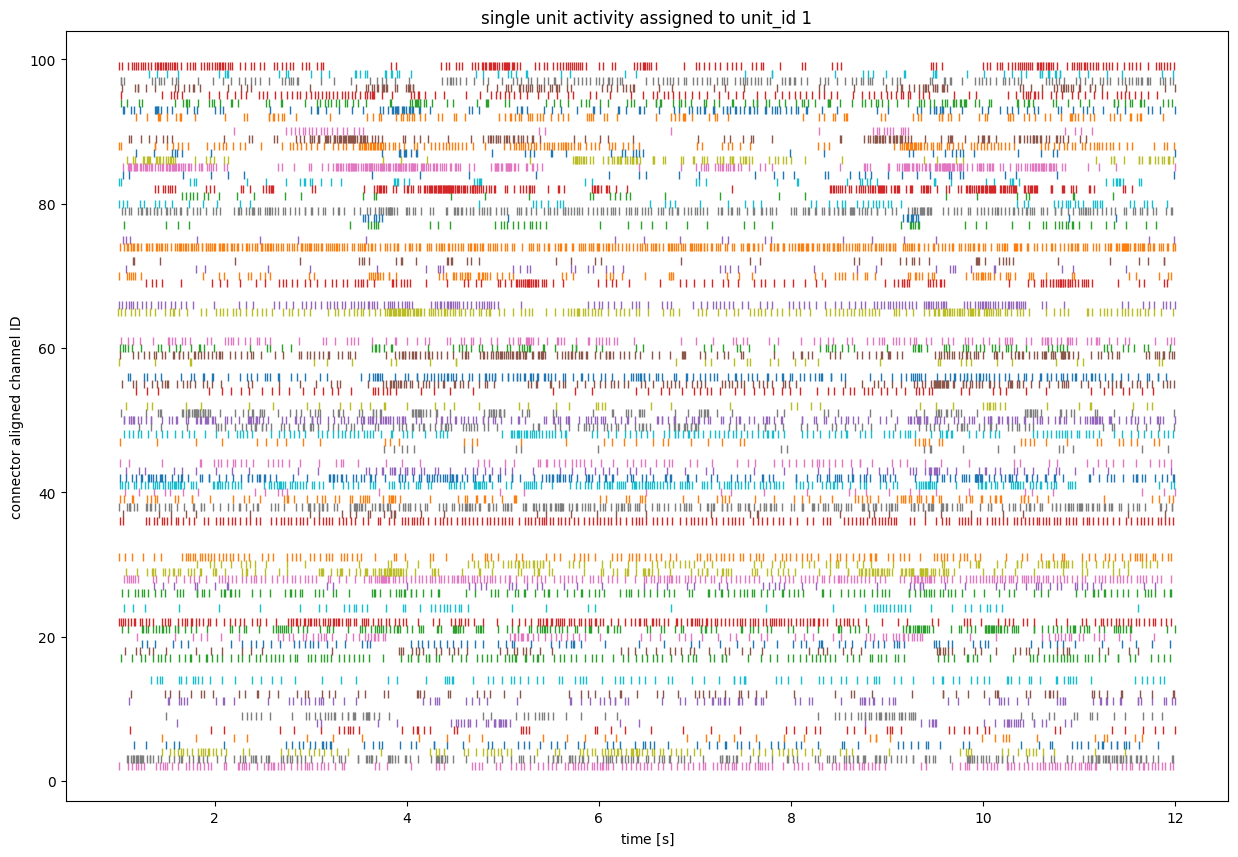

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
for st in sts:
    plt.plot(st.times, [st.annotations['connector_aligned_id']]*len(st), '|')
plt.xlabel(f'time [{sts[0].times.dimensionality.latex}]')
plt.ylabel(f'connector aligned channel ID')
plt.title('single unit activity assigned to unit_id 1')
ax = plt.gca()

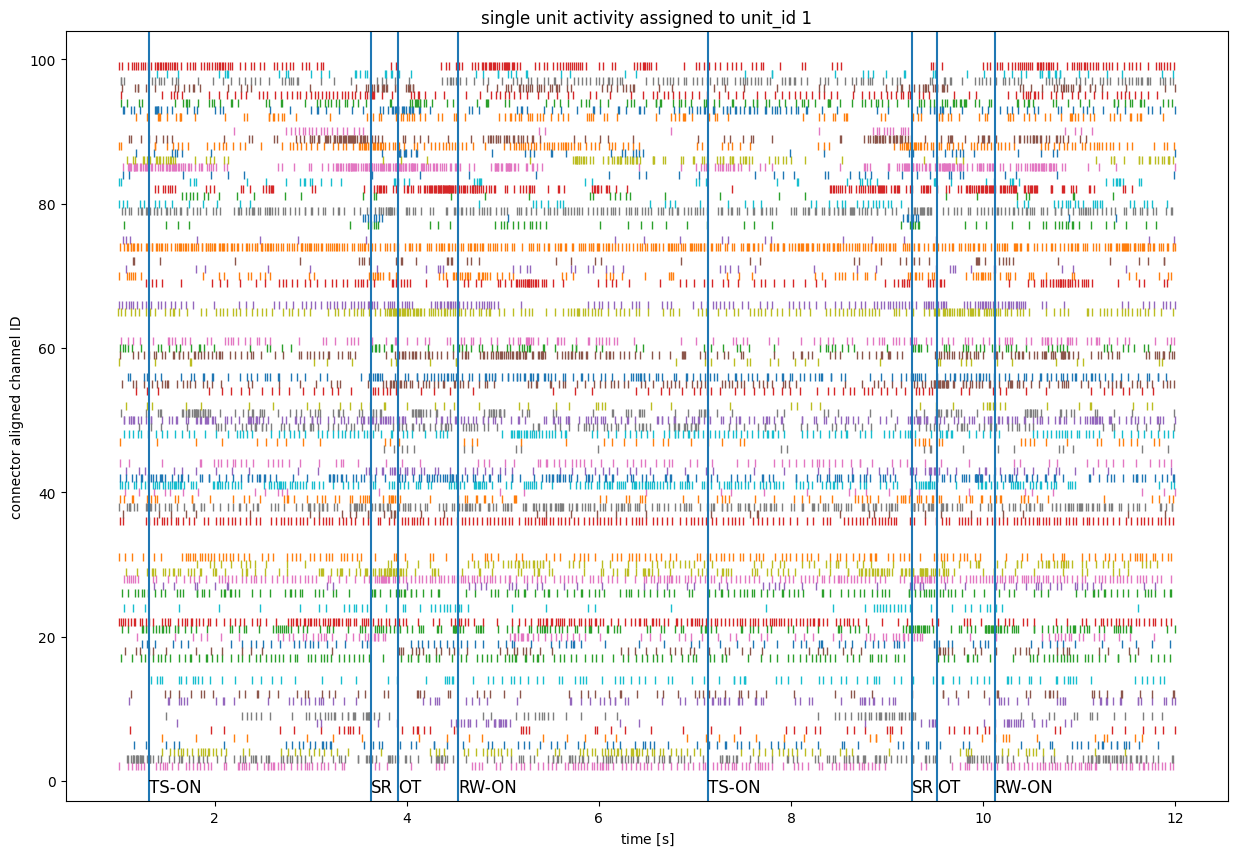

In [6]:
# recreate spike plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
for st in sts:
    plt.plot(st.times, [st.annotations['connector_aligned_id']]*len(st), '|')
plt.xlabel(f'time [{sts[0].times.dimensionality.latex}]')
plt.ylabel(f'connector aligned channel ID')
plt.title('single unit activity assigned to unit_id 1')
ax = plt.gca()

# add event lines
event = segment_cut.events[0]
event_labels = ['TS-ON', 'SR', 'OT', 'RW-ON']
event_colors = ['k', 'b', 'g', 'r']
for ev_idx in range(len(event)):
    if event.labels[ev_idx] in event_labels:
        event_label = event.labels[ev_idx]
        plt.axvline(event.times[ev_idx])
        plt.text(event.times[ev_idx], -1.5, event_label, fontsize=12)